## Cleaning - Euroleague Project

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import glob
import matplotlib.pyplot as plt

# Suppressing scientific notation globally
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [26]:
# Concatenating all the NBA foreign born files into one
files = glob.glob('data/nba/*csv')
dfs = []
for file in files:
    df = pd.read_csv(file)
    df['Country'] = file
    dfs.append(df)
    df['Country'] = df['Country'].str.split('_').str[0]
df = pd.concat(dfs, ignore_index=True)
df['Country'] = df['Country'].str.split('/', n=1).str[-1]
df['Country'] = df['Country'].str.split('/', n=1).str[-1]

# Replacing header row 
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header

In [27]:
# Renaming columns
df = df.rename(columns={'switzerland':'Country', 'Date':'Birth Date'})
# df = df.rename(columns={ df.columns[25]: "PPG"})
# df = df.rename(columns={ df.columns[24]: "MP PG"})
# df = df.rename(columns={ df.columns[26]: "TRB PG"})
# df = df.rename(columns={ df.columns[27]: "AST PG"})

# Cleaning up country names
df = df.replace(to_replace ="antigua", value ="Antigua Barbuda") 
df = df.replace(to_replace ="cape", value ="Cape Verde")
df = df.replace(to_replace ="czech", value ="Czech Republic")
df = df.replace(to_replace ="dominican", value ="Dominican Republic")
df = df.replace(to_replace ="french", value ="French Guiana")
df = df.replace(to_replace ="new", value ="New Zealand")
df = df.replace(to_replace ="puerto", value ="Puerto Rico")
df = df.replace(to_replace ="saint", value ="Saint Lucia")
df = df.replace(to_replace ="saintvincent", value ="Saint Vincent and the Grenadines")
df = df.replace(to_replace ="south", value ="South Africa")
df = df.replace(to_replace ="southsudan", value ="South Africa")
df = df.replace(to_replace ="trinidad", value ="Trinidad & Tobago")
df = df.replace(to_replace ="united", value ="United Kingdom")
df = df.replace(to_replace ="us", value ="US Virgin Islands")

# Capitalizing the countries 
df['Country'] = df.Country.str.title() 



In [28]:
# Dropping duplicates
df = df.drop_duplicates()

# Dropping the Ranking column 
df = df.drop(['Rk'], axis=1)

# Dropping the extra header rows that keep popping up
df = df[~df.From.str.contains("From")]

In [29]:
#df.to_csv('data/cleaned/composite.csv', header = True)

In [30]:
df.head(60)

,Player,Yrs,From,To,G,MP,FG,FGA,3P,3PA,...,FG%,3P%,FT%,MP,PTS,TRB,AST,Birth Date,City,Country
1,Clint Capela,6,2015,2020,334,8674,1766,2785,0,2,...,0.634,0,0.526,26,12.2,9.7,1,18-May-94,Geneva,Switzerland
2,Enes Kanter,9,2012,2020,641,13932,3036,5596,43,150,...,0.543,0.287,0.776,21.7,11.6,7.6,0.9,20-May-92,Zurich,Switzerland
3,Thabo Sefolosha,14,2007,2020,869,19062,1916,4265,513,1469,...,0.449,0.349,0.732,21.9,5.7,3.7,1.4,2-May-84,Vevey,Switzerland
4,Nikola Vučević,9,2012,2020,598,18103,4185,8386,276,825,...,0.499,0.335,0.746,30.3,16.1,10.2,2.6,24-Oct-90,Morges,Switzerland
6,Edy Tavares,2,2016,2017,13,101,15,24,0,0,...,0.625,NaN,0.273,7.8,2.5,2.5,0.3,22-Mar-92,Maio,Cape Verde
8,Bol Bol,1,2020,2020,7,87,14,28,4,9,...,0.5,0.444,0.8,12.4,5.7,2.7,0.9,16-Nov-99,Khartoum,Sudan
9,Wenyen Gabriel,1,2020,2020,30,235,21,48,6,20,...,0.438,0.3,0.682,7.8,2.1,1.7,0.3,26-Mar-97,Khartoum,Sudan
11,Sergei Bazarevich,1,1995,1995,10,74,11,22,1,6,...,0.5,0.167,0.778,7.4,3,0.7,1.4,16-Mar-65,Moscow,Russia
12,Sergey Karasev,3,2014,2016,95,1110,96,243,31,110,...,0.395,0.282,0.842,11.7,3,1.5,0.9,26-Oct-93,St. Petersburg,Russia
13,Sasha Kaun,1,2016,2016,25,95,9,17,0,0,...,0.529,NaN,0.455,3.8,0.9,1,0.1,8-May-85,Tomsk,Russia


In [31]:
# Cleaning the Euroleague data
files = glob.glob('data/euroleague/*csv')
dfs = []
for file in files:
    euro_df = pd.read_csv(file)
    euro_df['End Year'] = file
    dfs.append(euro_df)
    euro_df['End Year'] = euro_df['End Year'].str.split('_').str[1]

euro_df = pd.concat(dfs, ignore_index=True)
euro_df['End Year'] = euro_df['End Year'].str.split('.').str[0]
#euro_df.to_csv('data/cleaned/euroleague_composite.csv', index=False)
euro_df

,Player,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,End Year
0,Aaron Miles,Panionios On Telecoms,10,322,37,95,0.389,5,20,0.250,...,5,23,28,33,19,1,22,20,102,2009
1,Aboubakar Zaki,SLUC Nancy,10,87,5,12,0.417,0,1,0.000,...,6,14,20,2,1,5,4,13,13,2009
2,Adam Chubb,Alba Berlin,16,282,44,75,0.587,1,1,1.000,...,18,48,66,2,6,4,19,57,121,2009
3,Adam Hrycaniuk,Asseco Prokom Sopot,15,164,6,29,0.207,0,3,0.000,...,19,33,52,3,6,2,11,35,17,2009
4,Adam Lapeta,Asseco Prokom Sopot,4,26,3,5,0.600,0,1,0.000,...,4,1,5,0,0,0,0,7,8,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6573,Vule Avdalovic,Partizan,14,323,28,73,0.384,15,39,0.385,...,4,15,19,23,13,2,23,53,105,2004
6574,Walter Herrmann,Unicaja Malaga,12,306,43,108,0.398,9,35,0.257,...,21,44,65,8,4,3,18,21,115,2004
6575,Ioannis Bourousis,AEK Athens,12,94,9,18,0.500,0,0,NaN,...,9,17,26,3,4,4,2,23,21,2004
6576,Yoav Saffar,Maccabi Tel Aviv,3,1,0,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,2004


In [32]:
# Dropping rows with incomplete information. I'm not too concerned with the information lost here since most
# players with meaningful minutes will have some contribution to each metric. 
euro_df = euro_df.dropna()
euro_df

,Player,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,End Year
0,Aaron Miles,Panionios On Telecoms,10,322,37,95,0.389,5,20,0.250,...,5,23,28,33,19,1,22,20,102,2009
1,Aboubakar Zaki,SLUC Nancy,10,87,5,12,0.417,0,1,0.000,...,6,14,20,2,1,5,4,13,13,2009
2,Adam Chubb,Alba Berlin,16,282,44,75,0.587,1,1,1.000,...,18,48,66,2,6,4,19,57,121,2009
3,Adam Hrycaniuk,Asseco Prokom Sopot,15,164,6,29,0.207,0,3,0.000,...,19,33,52,3,6,2,11,35,17,2009
4,Adam Lapeta,Asseco Prokom Sopot,4,26,3,5,0.600,0,1,0.000,...,4,1,5,0,0,0,0,7,8,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,Vlado Ilievski,FC Barcelona,20,544,63,148,0.426,33,76,0.434,...,6,24,30,47,25,0,33,49,198,2004
6572,Vrbica Stefanov,Montepaschi Siena,20,604,81,150,0.540,31,60,0.517,...,11,23,34,60,29,0,15,45,212,2004
6573,Vule Avdalovic,Partizan,14,323,28,73,0.384,15,39,0.385,...,4,15,19,23,13,2,23,53,105,2004
6574,Walter Herrmann,Unicaja Malaga,12,306,43,108,0.398,9,35,0.257,...,21,44,65,8,4,3,18,21,115,2004


In [33]:
# Individual player lookup
player_df = euro_df.groupby('Player')
player_df.get_group('Zoran Savic')

,Player,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,End Year
2502,Zoran Savic,FC Barcelona,4,46,7,15,0.467,1,3,0.333,...,2,6,8,1,2,0,6,10,19,2001
3542,Zoran Savic,Skipper Fortitudo Bologna,19,321,62,118,0.525,19,53,0.358,...,13,40,53,18,11,1,33,58,175,2002


In [34]:
# Aggregate functions to combine player stats
euro_calc = euro_df.drop(columns=['Team', 'End Year'])

euro_calc = euro_calc.groupby(['Player'], as_index=False).agg({'G':'sum', 'MP':'sum', 'FG':'sum', 
                                                               'MP':'sum', 'FG':'sum', 'FGA':'sum', 
                                                               '3P':'sum', '3PA':'sum', '3P%':'mean', '2P':'sum',
                                                               '2PA':'sum', '2P%':'mean', 'eFG%':'mean', 'FT':'sum',
                                                               'FTA':'sum', 'FT%':'mean', 'ORB':'sum', 'DRB':'sum'
                                                              , 'TRB':'sum', 'AST':'sum', 'STL':'sum', 'BLK':'sum'
                                                              , 'TOV':'sum', 'PF':'sum', 'PTS':'sum'})


In [35]:
# Advanced calculations and fixing of the existing percentages
euro_calc['3P%'] = euro_calc['3P']/euro_calc['3PA']
euro_calc['2P%'] = euro_calc['2P']/euro_calc['2PA']
euro_calc['eFG%'] = (((euro_calc['2P']) + (1.5*euro_calc['3P']))/ euro_calc['FGA'])

# True Shooting %
euro_calc['TS%'] = ((euro_calc['PTS']) / (2*(euro_calc['FGA'] + 0.44*euro_calc['FTA'])))

# Turnover %
euro_calc['TOV%'] = ((100*euro_calc['TOV']) / ((euro_calc['FGA']) + (0.44*euro_calc['FTA']) + (euro_calc['TOV'])))


euro_calc

,Player,G,MP,FG,FGA,3P,3PA,3P%,2P,2PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,TOV%
0,A.J. Slaughter,23,524,80,206,40,109,0.366972,40,97,...,40,46,39,10,1,27,56,224,0.510949,10.966694
1,AJ Guyton,14,252,31,80,14,42,0.333333,17,38,...,16,21,13,11,0,11,25,87,0.497257,11.169781
2,Aaron Doornekamp,58,1122,101,265,65,179,0.363128,36,86,...,140,180,72,35,11,30,119,315,0.538867,9.308676
3,Aaron Jackson,178,3501,406,825,110,300,0.366667,296,525,...,248,325,457,117,5,211,298,1095,0.591969,18.575906
4,Aaron Miles,30,940,114,266,24,61,0.393443,90,205,...,82,100,107,48,4,64,66,305,0.507792,17.566974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,Zoran Erceg,98,2100,288,675,126,347,0.363112,162,328,...,259,348,81,70,15,84,182,895,0.577837,9.785192
1933,Zoran Planinic,164,3966,560,1229,108,367,0.294278,452,862,...,366,464,553,156,27,312,443,1538,0.536577,17.878017
1934,Zoran Savic,23,367,69,133,20,56,0.357143,49,77,...,46,61,19,13,1,39,68,194,0.610216,19.700950
1935,Zoran Vrkic,6,50,7,12,2,3,0.666667,5,9,...,10,11,1,2,0,3,6,20,0.683060,17.006803


In [36]:
# Rounding
euro_calc = euro_calc.round({'3P%': 2, 'FT%': 2, '2P%': 2, 'eFG%': 2, 'TS%': 2, 'TOV%': 2})

euro_calc.to_csv('data/cleaned/euroleague_composite.csv', index=False)

## Exploration - Euroleague Project

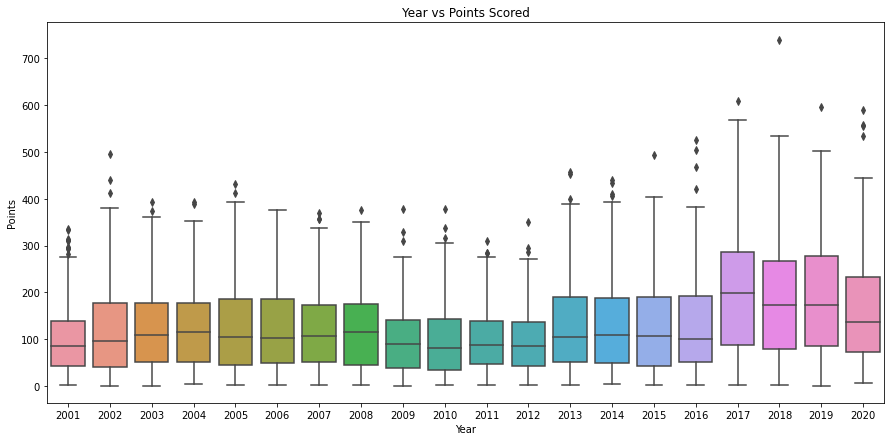

In [37]:
# Total Points
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs Points Scored')
sns.boxplot(euro_df['End Year'], euro_df['PTS'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

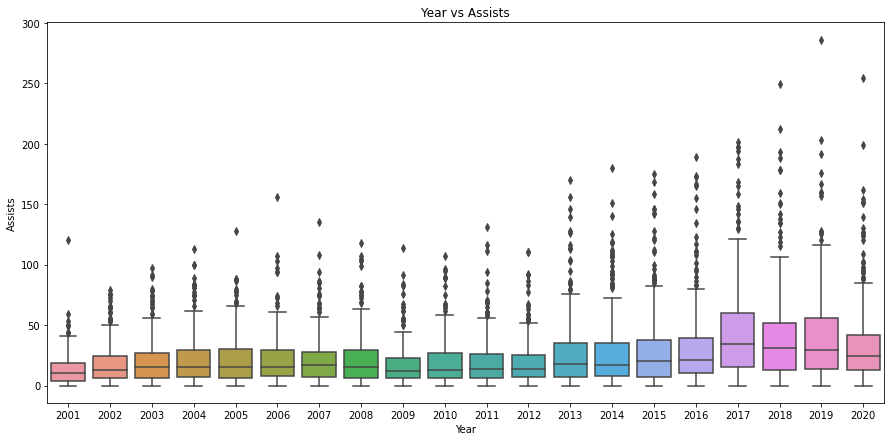

In [38]:
# Total Assists
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs Assists')
sns.boxplot(euro_df['End Year'], euro_df['AST'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Assists')
plt.show()

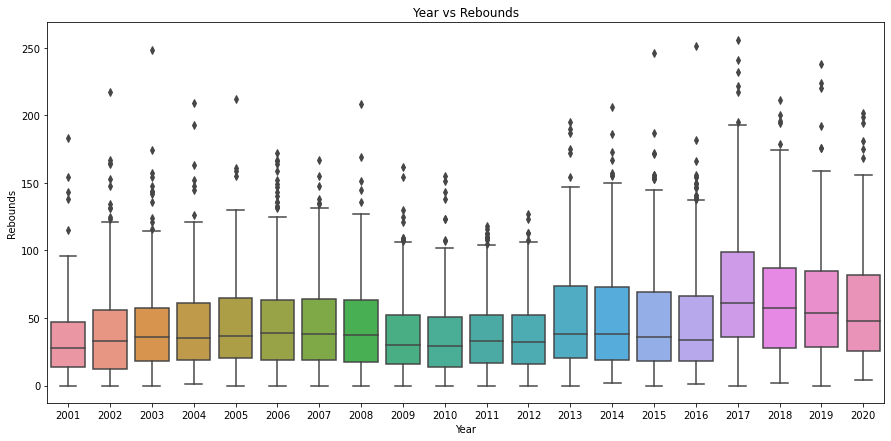

In [39]:
# Total Rebounds
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs Rebounds')
sns.boxplot(euro_df['End Year'], euro_df['TRB'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Rebounds')
plt.show()

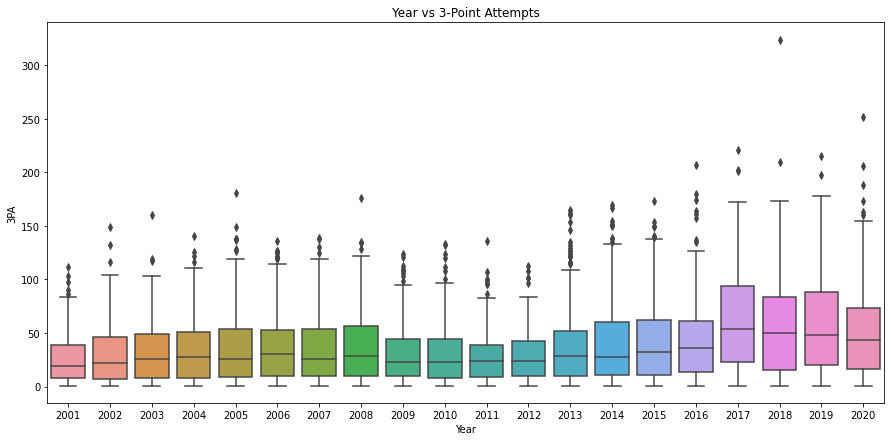

In [40]:
# 3 Point Attempts
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs 3-Point Attempts')
sns.boxplot(euro_df['End Year'], euro_df['3PA'], ax=ax)
plt.xlabel('Year')
plt.ylabel('3PA')
plt.show()

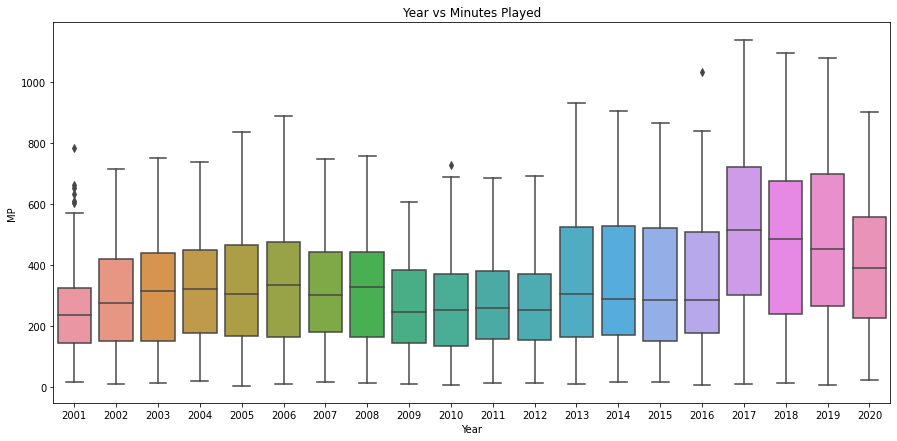

In [41]:
# Minutes PLayed
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs Minutes Played')
sns.boxplot(euro_df['End Year'], euro_df['MP'], ax=ax)
plt.xlabel('Year')
plt.ylabel('MP')
plt.show()

In [42]:
# Cleaning the Advanced NBA data
files = glob.glob('data/advanced_nba/*csv')
dfs = []
for file in files:
    adv_nba = pd.read_csv(file)
    adv_nba['End Year'] = file
    dfs.append(adv_nba)
    adv_nba['End Year'] = adv_nba['End Year'].str.split('_').str[3]
    adv_nba['Player'] = adv_nba['Player'].str.split('\\').str[0]

adv_nba = pd.concat(dfs, ignore_index=True)
adv_nba['End Year'] = adv_nba['End Year'].str.split('.').str[0]
adv_nba.drop(adv_nba[adv_nba['Tm'] == 'TOT'].index, inplace = True)
del adv_nba['Unnamed: 24']
del adv_nba['Unnamed: 19']
adv_nba = adv_nba.dropna()
#adv_nba.to_csv('data/cleaned/nba_advanced.csv', index=False)
adv_nba

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,End Year
0,1,Shareef Abdur-Rahim,PF,29,SAC,72,1961,17.2,0.588,0.035,...,20.1,4.0,2.2,6.2,0.152,0.5,0.4,0.9,1.4,2006
1,2,Alex Acker,SG,23,DET,5,35,-2.4,0.281,0.313,...,27.2,-0.2,0.0,-0.2,-0.230,-11.0,-4.2,-15.3,-0.1,2006
2,3,Malik Allen,PF,27,CHI,54,701,11.5,0.504,0.004,...,19.2,0.0,1.0,1.0,0.068,-3.0,0.3,-2.7,-0.1,2006
3,4,Ray Allen*,SG,30,SEA,78,3022,22.2,0.590,0.435,...,27.4,9.8,-0.3,9.5,0.150,6.4,-2.0,4.4,4.9,2006
4,5,Tony Allen,PG,24,BOS,51,978,12.9,0.554,0.124,...,18.8,0.6,1.0,1.7,0.082,-2.3,0.9,-1.4,0.1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12221,448,Julian Wright,SF,20,NOH,57,640,15.4,0.581,0.142,...,16.4,0.7,0.9,1.7,0.126,0.3,1.5,1.8,0.6,2008
12223,449,Lorenzen Wright,C,32,ATL,13,148,3.7,0.331,0.000,...,6.6,-0.1,0.2,0.1,0.028,-6.0,0.8,-5.2,-0.1,2008
12224,449,Lorenzen Wright,C,32,SAC,5,13,-11.7,0.250,0.000,...,20.6,-0.1,0.0,-0.1,-0.304,-17.3,-4.8,-22.2,-0.1,2008
12225,450,Nick Young,SG,22,WAS,75,1158,11.6,0.527,0.209,...,24.9,-0.1,0.6,0.4,0.017,-2.6,-2.1,-4.7,-0.8,2008


In [60]:
# Aggregate functions to combine player stats
ws_df = adv_nba[['Player','PER','WS', 'MP', 'VORP', 'End Year']]

ws_df = ws_df.groupby(['Player'], as_index=False).agg({'PER':'sum', 'MP':'sum', 'WS':'sum','VORP':'sum'})
ws_df

,Player,PER,MP,WS,VORP
0,A.C. Green,22.40000,3340,8.20000,0.70000
1,A.J. Bramlett,-0.40000,61,-0.20000,-0.20000
2,A.J. Guyton,13.10000,1246,0.30000,-0.20000
3,A.J. Hammons,8.40000,163,0.00000,-0.20000
4,A.J. Price,81.50000,3929,4.70000,0.60000
...,...,...,...,...,...
2016,Ömer Aşık,95.10000,9216,20.80000,0.20000
2017,Šarūnas Jasikevičius,37.10000,2530,4.50000,0.80000
2018,Žan Tabak,24.10000,891,1.00000,-0.40000
2019,Žarko Čabarkapa,67.20000,1550,1.20000,-0.70000


In [72]:
foreign_player_list = df['Player'].tolist()
foreign_player_list

['Clint Capela',
 'Enes Kanter',
 'Thabo Sefolosha',
 'Nikola Vučević',
 'Edy Tavares',
 'Bol Bol',
 'Wenyen Gabriel',
 'Sergei Bazarevich',
 'Sergey Karasev',
 'Sasha Kaun',
 'Andrei Kirilenko',
 'Yaroslav Korolev',
 'Johnny Macknowski',
 'Sergei Monia',
 'Timofey Mozgov',
 'Pavel Podkolzin',
 'Alexey Shved',
 'Alexander Volkov',
 'Deandre Ayton',
 'Dexter Cambridge',
 'Buddy Hield',
 'Ian Lockhart',
 'Mychal Thompson',
 'Adonal Foyle',
 'Nicolás Brussino',
 'Carlos Delfino',
 'Patricio Garino',
 'Manu Ginóbili',
 'Walter Herrmann',
 'Nicolás Laprovíttola',
 'Andrés Nocioni',
 'Fabricio Oberto',
 'Pablo Prigioni',
 'Pepe Sánchez',
 'Luis Scola',
 'Rubén Wolkowyski',
 'Hank Beenders',
 'Francisco Elson',
 'Dan Gadzuric',
 'Geert Hammink',
 'Swen Nater',
 'Rik Smits',
 'Rawle Marshall',
 'Jason Miskiri',
 'Kyle Alexander',
 'Nickeil Alexander-Walker',
 'Joel Anthony',
 'Norm Baker',
 'RJ Barrett',
 'Anthony Bennett',
 'Sim Bhullar',
 'Khem Birch',
 'Oshae Brissett',
 'Dillon Brooks',
 '

In [73]:
foreign_filter = ws_df.Player.isin(foreign_player_list)
foreign_ws_df = ws_df[foreign_filter]
foreign_ws_df

,Player,PER,MP,WS,VORP
14,Abdel Nader,25.20000,2083,2.10000,-0.40000
18,Adam Mokoka,8.20000,112,0.20000,-0.10000
20,Admiral Schofield,6.10000,368,0.10000,-0.30000
21,Adonal Foyle,133.10000,11787,17.70000,1.40000
26,Al Horford,244.60000,27810,91.30000,33.80000
...,...,...,...,...,...
2016,Ömer Aşık,95.10000,9216,20.80000,0.20000
2017,Šarūnas Jasikevičius,37.10000,2530,4.50000,0.80000
2018,Žan Tabak,24.10000,891,1.00000,-0.40000
2019,Žarko Čabarkapa,67.20000,1550,1.20000,-0.70000


In [74]:
# Rounding
foreign_ws_df = foreign_ws_df.round({'PER': 2, 'WS': 2, 'VORP': 2})
foreign_ws_df

,Player,PER,MP,WS,VORP
14,Abdel Nader,25.20000,2083,2.10000,-0.40000
18,Adam Mokoka,8.20000,112,0.20000,-0.10000
20,Admiral Schofield,6.10000,368,0.10000,-0.30000
21,Adonal Foyle,133.10000,11787,17.70000,1.40000
26,Al Horford,244.60000,27810,91.30000,33.80000
...,...,...,...,...,...
2016,Ömer Aşık,95.10000,9216,20.80000,0.20000
2017,Šarūnas Jasikevičius,37.10000,2530,4.50000,0.80000
2018,Žan Tabak,24.10000,891,1.00000,-0.40000
2019,Žarko Čabarkapa,67.20000,1550,1.20000,-0.70000


In [75]:
# Filtering on only foreign players from list
new_df = adv_nba[['Player','PER','WS', 'MP', 'VORP', 'End Year']]
foreign_filter = new_df.Player.isin(foreign_player_list)
foreign_new_df = new_df[foreign_filter]
foreign_new_df

,Player,PER,WS,MP,VORP,End Year
12,Martynas Andriuškevičius,15.50000,0.00000,9,0.00000,2006
14,Rafael Araújo,4.50000,-0.80000,601,-0.90000,2006
21,Carlos Arroyo,12.50000,1.00000,600,0.00000,2006
22,Carlos Arroyo,18.80000,1.70000,594,0.50000,2006
31,Leandro Barbosa,15.10000,3.80000,1592,0.80000,2006
...,...,...,...,...,...,...
12155,Hedo Türkoğlu,17.80000,9.00000,3026,3.60000,2008
12157,Beno Udrih,13.30000,2.40000,2080,0.30000,2008
12158,Anderson Varejão,12.00000,2.40000,1320,-0.20000,2008
12161,Marcus Vinicius,11.60000,0.10000,69,0.00000,2008


In [86]:
# Filtering on only foreign players from list
new_df = adv_nba[['Player','PER','WS', 'MP', 'VORP', 'End Year']]
not_foreign_new_df = new_df[~new_df(foreign_player_list)]
not_foreign_new_df

TypeError: 'DataFrame' object is not callable

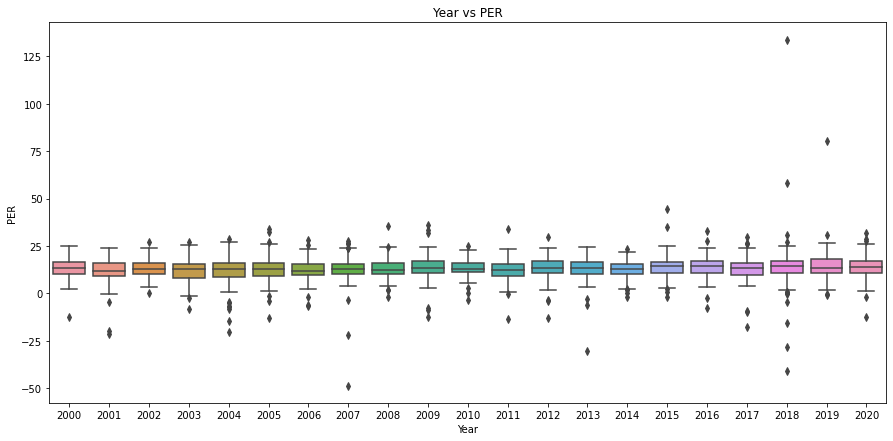

In [76]:
# Total PER for Foreign Players 
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs PER')
sns.boxplot(foreign_new_df['End Year'], foreign_new_df['PER'], ax=ax)
plt.xlabel('Year')
plt.ylabel('PER')
plt.show()

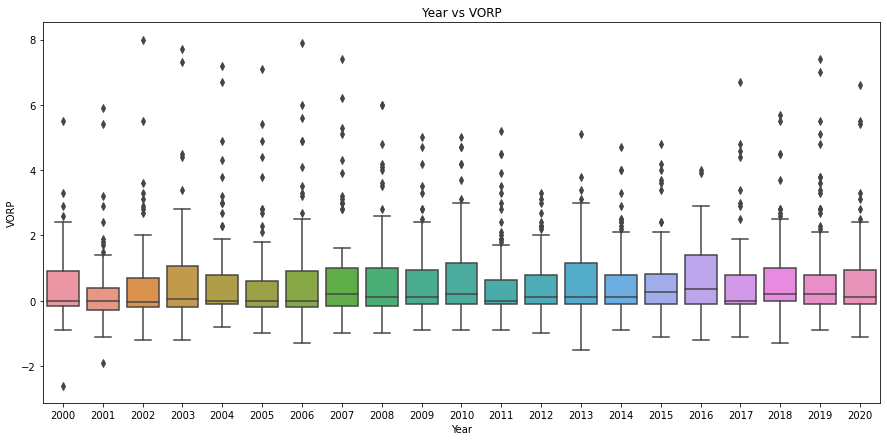

In [77]:
# Total VORP for Foreign Players 
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs VORP')
sns.boxplot(foreign_new_df['End Year'], foreign_new_df['VORP'], ax=ax)
plt.xlabel('Year')
plt.ylabel('VORP')
plt.show()

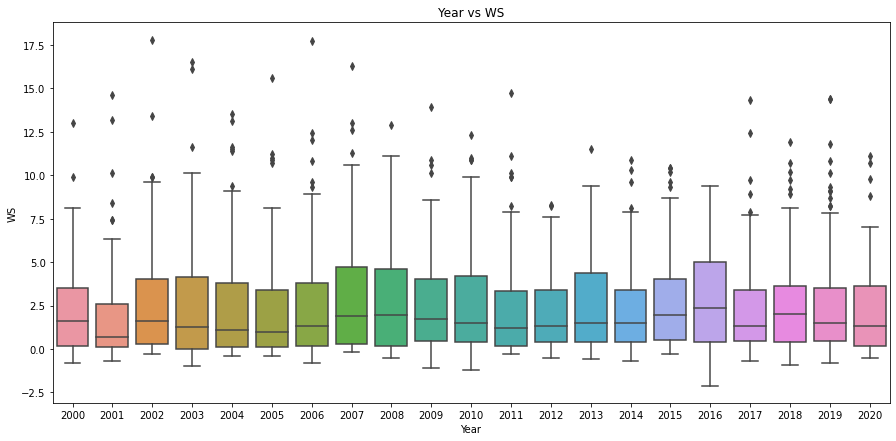

In [78]:
# Total Win Shares for Foreign Players 
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs WS')
sns.boxplot(foreign_new_df['End Year'], foreign_new_df['WS'], ax=ax)
plt.xlabel('Year')
plt.ylabel('WS')
plt.show()